In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [74]:
full = pd.read_csv('full2.csv')
decom = pd.read_csv('decomm.csv')
non_decomm = pd.read_csv('non_decomm.csv')
highest_temp = pd.read_csv('highest_temp.csv')
highest_trips = pd.read_csv('highest_trips.csv')
trips_per_day = pd.read_csv('trips_per_day.csv')

In [75]:
# Check unique listings in 'usertype' column
full['usertype'].unique()

array(['Short-Term Pass Holder', nan, 'Member'], dtype=object)

In [76]:
# Found 'usertype' had nan value, replaced with 'neither'
full['usertype'] = full['usertype'].fillna('neither')

In [77]:
# Validating above step
full['usertype'].unique()

array(['Short-Term Pass Holder', 'neither', 'Member'], dtype=object)

In [78]:
# List of all columns
full.columns

Index(['Unnamed: 0', 'trip_id', 'Date', 'starttime', 'bikeid', 'tripduration',
       'from_station_name', 'station_id', 'usertype', 'start_hour',
       'Mean_Temperature_F', 'Events', 'lat', 'long', 'install_date',
       'current_dockcount', 'decommission_date'],
      dtype='object')

In [79]:
# Extra index saved when saving .csv, dropped
full = full.drop('Unnamed: 0', axis=1)

In [80]:
# Applying the get dummies method on the usertype column
full = pd.get_dummies(full, columns=['usertype'])

In [81]:
full.sample(5)

,trip_id,Date,starttime,bikeid,tripduration,from_station_name,station_id,start_hour,Mean_Temperature_F,Events,lat,long,install_date,current_dockcount,decommission_date,usertype_Member,usertype_Short-Term Pass Holder,usertype_neither
173686,247064,12/08/2016,21:21:00,SEA00055,789.968,E Harrison St & Broadway Ave E,CH-02,21:00:00,75.0,BLANK,47.622063,-122.321251,13-Oct-14,20.0,NaN,1,0,0
246630,134580,24/08/2015,17:04:00,SEA00196,525.042,6th Ave & Blanchard St,BT-04,17:00:00,66.0,BLANK,47.616094,-122.341102,13-Oct-14,16.0,NaN,1,0,0
73990,106939,11/07/2015,14:26:00,SEA00388,870.021,UW Intramural Activities Building,UW-07,14:00:00,68.0,BLANK,47.653713,-122.302162,13-Oct-14,14.0,NaN,0,1,0
122424,45863,11/03/2015,13:46:00,SEA00471,1294.144,Eastlake Ave E & E Allison St,EL-05,13:00:00,56.0,Rain,47.649090,-122.322983,13-Oct-14,18.0,NaN,1,0,0
197905,42408,02/03/2015,10:57:00,SEA00154,267.711,6th Ave & Blanchard St,BT-04,10:00:00,49.0,BLANK,47.616094,-122.341102,13-Oct-14,16.0,NaN,1,0,0


In [82]:
# Manipulate data to change catagorical to numerical
full = pd.get_dummies(full, columns=['Events'])
full.sample(5)

,trip_id,Date,starttime,bikeid,tripduration,from_station_name,station_id,start_hour,Mean_Temperature_F,lat,...,usertype_Member,usertype_Short-Term Pass Holder,usertype_neither,Events_BLANK,Events_Fog,Events_Fog-Rain,Events_Rain,Events_Rain-Snow,Events_Rain-Thunderstorm,Events_Snow
137002,230618,07/07/2016,16:15:00,SEA00306,801.439,E Blaine St & Fairview Ave E,EL-03,16:00:00,64.0,47.634831,...,1,0,0,0,0,0,1,0,0,0
220078,26753,08/01/2015,16:12:00,SEA00079,195.881,Seattle Aquarium / Alaskan Way S & Elliott Bay...,WF-04,16:00:00,44.0,47.607702,...,1,0,0,0,1,0,0,0,0,0
118183,184788,19/02/2016,19:46:00,SEA00097,448.602,Mercer St & 9th Ave N,SLU-21,19:00:00,46.0,47.624769,...,1,0,0,0,0,0,1,0,0,0
54525,8002,31/10/2014,18:02:00,SEA00098,1441.379,Westlake Ave & 6th Ave,SLU-15,18:00:00,54.0,47.613628,...,0,1,0,0,0,0,1,0,0,0
223245,222599,18/06/2016,18:53:00,SEA00084,263.715,UW Intramural Activities Building,UW-07,18:00:00,60.0,47.653713,...,1,0,0,0,0,0,1,0,0,0


In [83]:
trips_per_day.sample(5)

,Unnamed: 0,Date,from_station_name,Mean_Temperature_F,Events,number_of_trips
12879,12879,13/03/2015,Summit Ave & E Denny Way,59.0,Rain,18
16334,16334,16/06/2015,9th Ave N & Mercer St,64.0,BLANK,7
23928,23928,23/05/2015,Key Arena / 1st Ave N & Harrison St,59.0,Rain,13
10172,10172,10/07/2016,Thomas St & 5th Ave N,66.0,BLANK,11
27541,27541,26/08/2016,Lake Union Park / Valley St & Boren Ave N,74.0,BLANK,10


In [84]:
trips_per_day = trips_per_day.drop('Unnamed: 0', axis=1)

In [91]:
trips_per_day.head()

,Date,from_station_name,Mean_Temperature_F,Events,number_of_trips
0,01/01/2015,12th Ave & E Denny Way,35.0,BLANK,10
1,01/01/2015,12th Ave & E Mercer St,35.0,BLANK,6
2,01/01/2015,15th Ave E & E Thomas St,35.0,BLANK,4
3,01/01/2015,1st Ave & Marion St,35.0,BLANK,8
4,01/01/2015,2nd Ave & Blanchard St,35.0,BLANK,14


In [85]:
trips_per_day1 = pd.get_dummies(trips_per_day, columns=['Events'])
trips_per_day1.sample(5)

,Date,from_station_name,Mean_Temperature_F,number_of_trips,Events_BLANK,Events_Fog,Events_Fog-Rain,Events_Rain,Events_Rain-Snow,Events_Rain-Thunderstorm,Events_Snow
26756,25/12/2014,NE 47th St & 12th Ave NE,42.0,4,1,0,0,0,0,0,0
3620,04/06/2015,Eastlake Ave E & E Allison St,65.0,11,1,0,0,0,0,0,0
9470,09/12/2015,3rd Ave & Broad St,52.0,6,0,0,0,0,0,1,0
1159,02/02/2016,2nd Ave & Blanchard St,42.0,3,0,0,1,0,0,0,0
28932,28/01/2015,Bellevue Ave & E Pine St,50.0,14,1,0,0,0,0,0,0


In [86]:
trips_per_day.corr()['number_of_trips']

C:\Users\Admin\AppData\Local\Temp\ipykernel_10184\3768804220.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  trips_per_day.corr()['number_of_trips']


Mean_Temperature_F    0.147743
number_of_trips       1.000000
Name: number_of_trips, dtype: float64

In [126]:
trips_per_day['Date'] = pd.to_datetime(trips_per_day['Date'])
trips_per_day['DayOfWeek'] = trips_per_day['Date'].dt.dayofweek
trips_per_day['Month'] = trips_per_day['Date'].dt.month
trips_per_day['Year'] = trips_per_day['Date'].dt.year

features_cols = ['DayOfWeek', 'Month', 'Year', 'from_station_name']
target_col = 'number_of_trips'

X = trips_per_day[features_cols]
y = trips_per_day[target_col]

preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), ['from_station_name'])], remainder='passthrough')

X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 38.59657577999483


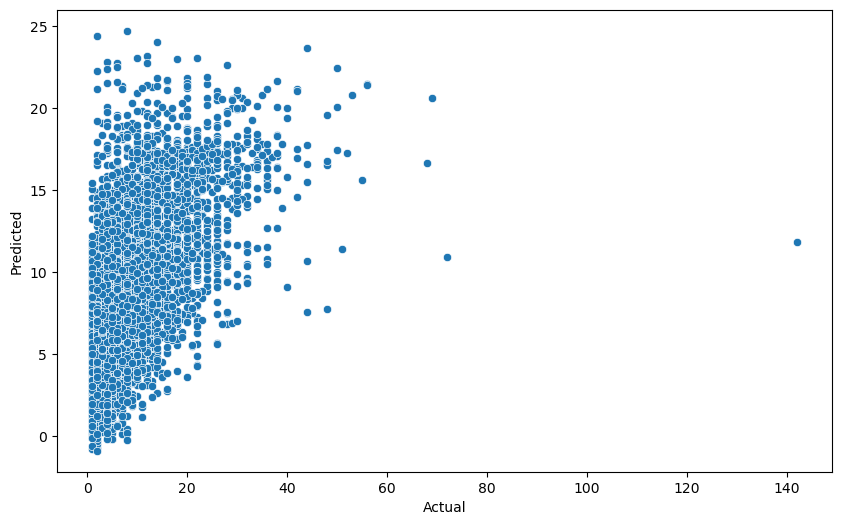

In [132]:
trips_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(10,6))
sns.scatterplot(x='Actual', y='Predicted', data=trips_pred)
plt.show();

In [124]:
features_cols = ['Mean_Temperature_F', 'Events', 'from_station_name']
target_col = 'number_of_trips'

X = trips_per_day[features_cols]
y = trips_per_day[target_col]

preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), ['Events', 'from_station_name'])], remainder='passthrough')

X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_test1 = y_test
y_pred1 = y_pred

mse = mean_squared_error(y_test1, y_pred1)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 41.121415312751516


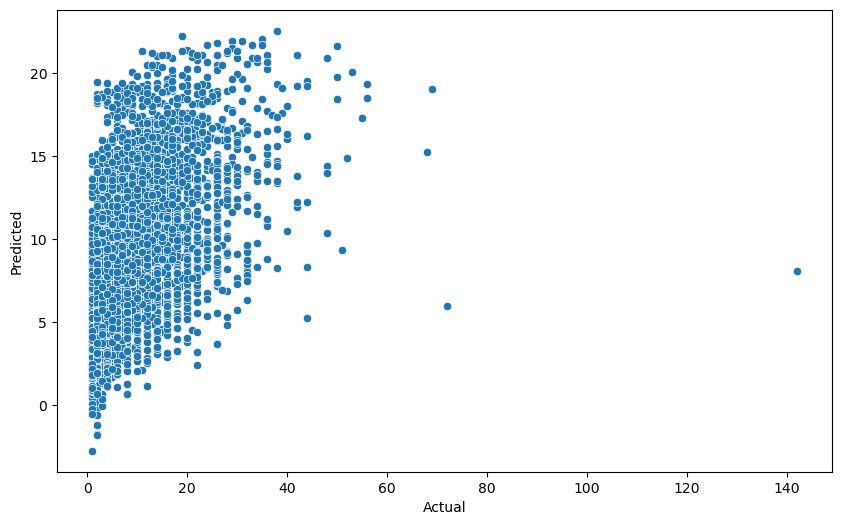

In [113]:
trips_pred1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})

plt.figure(figsize=(10,6))
sns.scatterplot(x='Actual', y='Predicted', data=trips_pred)
plt.show();

In [87]:
trips_per_day1 = pd.get_dummies(trips_per_day, columns=['from_station_name'])
trips_per_day1.sample(5)

,Date,Mean_Temperature_F,Events,number_of_trips,from_station_name_12th Ave & E Denny Way,from_station_name_12th Ave & E Mercer St,from_station_name_12th Ave & E Yesler Way,from_station_name_12th Ave & NE Campus Pkwy,from_station_name_15th Ave E & E Thomas St,from_station_name_15th Ave NE & NE 40th St,...,from_station_name_Summit Ave & E Denny Way,from_station_name_Summit Ave E & E Republican St,from_station_name_Terry Ave & Stewart St,from_station_name_Thomas St & 5th Ave N,from_station_name_UW Engineering Library / E Stevens Way NE & Jefferson Rd,from_station_name_UW Intramural Activities Building,from_station_name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,from_station_name_UW McCarty Hall / Whitman Ct,from_station_name_Union St & 4th Ave,from_station_name_Westlake Ave & 6th Ave
5778,06/06/2015,72.0,BLANK,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18133,18/02/2015,48.0,BLANK,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25018,24/05/2016,62.0,BLANK,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17631,17/08/2015,70.0,BLANK,34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4494,05/04/2015,50.0,BLANK,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
pd.DataFrame(trips_per_day1.corr()['number_of_trips']).sort_values('number_of_trips', ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10184\1214149901.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(trips_per_day1.corr()['number_of_trips']).sort_values('number_of_trips', ascending=False)


,number_of_trips
number_of_trips,1.000000
from_station_name_Pier 69 / Alaskan Way & Clay St,0.209497
from_station_name_E Pine St & 16th Ave,0.155480
Mean_Temperature_F,0.147743
from_station_name_3rd Ave & Broad St,0.143957
...,...
from_station_name_Burke Museum / E Stevens Way NE & Memorial Way NE,-0.082506
from_station_name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,-0.086535
from_station_name_12th Ave & E Yesler Way,-0.087566
from_station_name_UW Intramural Activities Building,-0.088765


In [89]:
trips_per_day1.columns

Index(['Date', 'Mean_Temperature_F', 'Events', 'number_of_trips',
       'from_station_name_12th Ave & E Denny Way',
       'from_station_name_12th Ave & E Mercer St',
       'from_station_name_12th Ave & E Yesler Way',
       'from_station_name_12th Ave & NE Campus Pkwy',
       'from_station_name_15th Ave E & E Thomas St',
       'from_station_name_15th Ave NE & NE 40th St',
       'from_station_name_1st Ave & Marion St',
       'from_station_name_2nd Ave & Blanchard St',
       'from_station_name_2nd Ave & Pine St',
       'from_station_name_2nd Ave & Spring St',
       'from_station_name_2nd Ave & Vine St',
       'from_station_name_3rd Ave & Broad St',
       'from_station_name_6th Ave & Blanchard St',
       'from_station_name_6th Ave S & S King St',
       'from_station_name_7th Ave & Union St', 'from_station_name_8D OPS 02',
       'from_station_name_9th Ave N & Mercer St',
       'from_station_name_Bellevue Ave & E Pine St',
       'from_station_name_Broadway and E Denny Way',